# Estimator in Extreme Value Theory

This notebook calculates Extreme Value Estimators based on 100m Data from 2008 to 2020 achieved by Women or Men depending on your choice of gender. The following estimator are calculated:

- Moment Estimator
- Hill Estimator
- Pickands Estimator
- Pengs Estimator
- W Estimator

After all the estimators are calculated, the approximated finite endpoint is calculated for the moment estimator approximation.


## Data Preparation

In [12]:
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
import numpy as np

In [44]:
gender = input("Choose gender of the analysis. Can be men or women. \nGender: ")
assert gender=="men" or gender=="women", "You did not provide the correct gender. Type men or women."

Choose gender of the analysis. Can be men or women. 
Gender:  men


In [21]:
# decide for men or women input set

df = pd.read_csv(f"data/csv-files/100m_{gender}_filtered.csv")
df.head()

,Mark,WIND,Competitor,Nat,Venue,Date,Speed
0,9.5800,0.9,Usain BOLT,JAM,"Olympiastadion, Berlin (GER)",2009-08-16,37.578288
1,9.6875,-0.1,Yohan BLAKE,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2012-08-23,37.161290
2,9.6925,2.0,Tyson GAY,USA,Shanghai (CHN),2009-09-20,37.142120
3,9.7000,0.0,Michael HERRERA,CUB,La Habana (CUB),2010-03-19,37.113402
4,9.7200,0.2,Asafa POWELL,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2008-09-02,37.037037


In [22]:
# get the personal bests of all competitors over the years and sort them from lowest to largest
personal_bests = df.Speed.sort_values(ascending=False).to_numpy()

# statistical sample set
X = personal_bests
n = len(X)

## Moment Estimator

In [23]:
def m_n(r: int, k: int, X: np.array) -> float:
    """Helper functions of the moment estimator"""
    return 1/(k) * sum([(log(X[i]) - log(X[k]))**r for i in range(k)])
                      

def moment_estimator(k: int, X: np.array) -> float:
    """Returns result of the moment estimator"""
    return m_n(1, k, X) + 1 - 1/2*(1- (m_n(1, k, X)**2)/m_n(2, k, X))**(-1)

In [24]:
# calculate all estimator for all k from 2, n-1
moment_estimators = [moment_estimator(k, X) for k in range(2, n)]

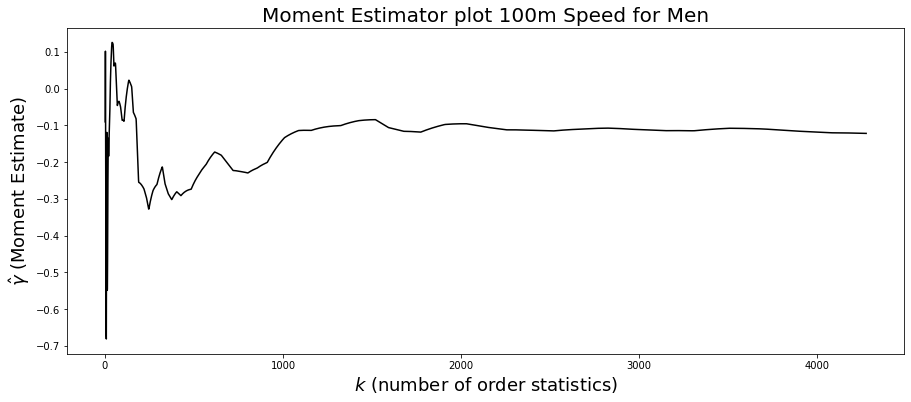

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), moment_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Moment Estimate)", fontsize=18)
plt.title(f"Moment Estimator plot 100m Speed for {gender.title()}", fontsize=20)
#plt.savefig(f"data/graphs/Moment_Estimator_{gender.title()}")
plt.show()

## Hill Estimator

The Hill Estimator is only suitable for an estimator $\gamma > 0$. Therefore the following results are problematic but still are presented. 

In [26]:
def hill_estimator(k: int, X: np.array) -> float:
    """Calculates the hill estimator for a given sample size k"""
    return 1/k * sum([log(X[i]) - log(X[k]) for i in range(k)])

In [27]:
hill_estimators = [hill_estimator(k, X) for k in range(2, n)]

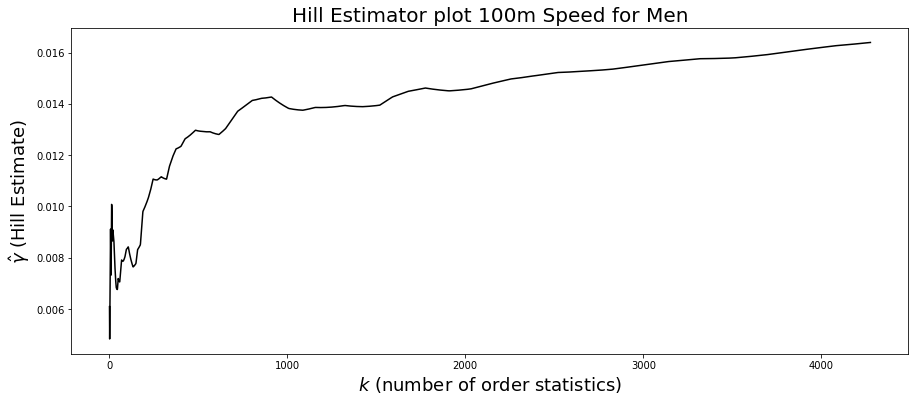

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), hill_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Hill Estimate)", fontsize=18)
plt.title(f"Hill Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Hill_Estimator_{gender.title()}")
plt.show()

## The Pickands Estimator

In [69]:
def pickands_estimator(k: int, X: np.array) -> float:
    """Calculates the Pickands Estimator for a given sample size k"""
    return 1/log(2) * log((X[k]-X[2*k])/(X[2*k]-X[4*k]))

In [70]:
pickands_estimators = [pickands_estimator(k, X) for k in range(1, int(n/4))]

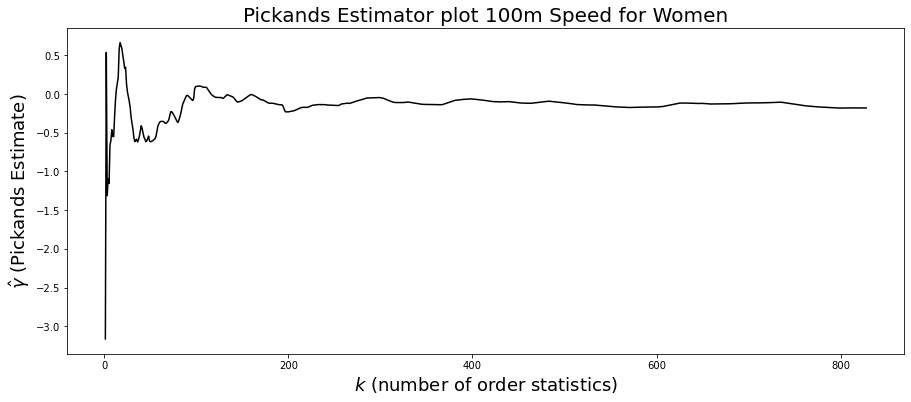

In [71]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,int(n/4)), pickands_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Pickands Estimate)", fontsize=18)
plt.title(f"Pickands Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Pickands_Estimator_{gender.title()}")
plt.show()

## Peng's Estimator

In [30]:
def m_n(r: int, k: int, X: np.array) -> float:
    """Calculates result of helper functions of the moment estimator"""
    return 1/(k) * sum([(log(X[i]) - log(X[k]))**r for i in range(k)])

def pengs_estimator(k: int, X: np.array) -> float:
    return m_n(2, k, X)/2*m_n(1, k, X) + 1 - 1/2*(1- (m_n(1, k, X)**2)/m_n(2, k, X))**(-1)

In [31]:
pengs_estimators = [pengs_estimator(k, X) for k in range(2,n)]

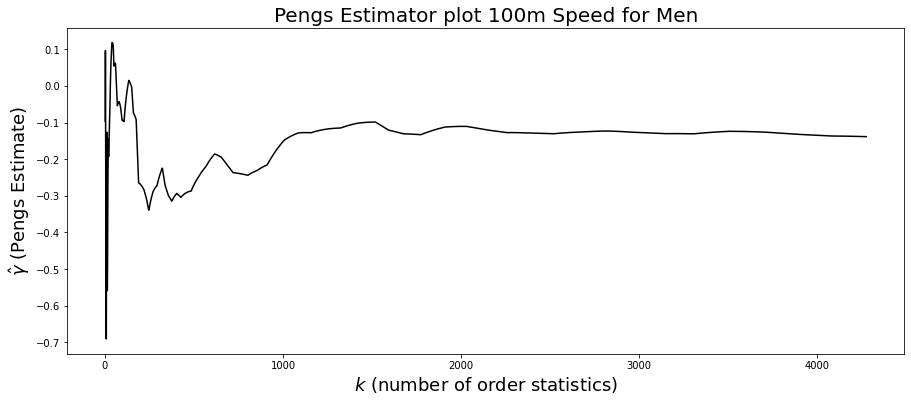

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), pengs_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Pengs Estimate)", fontsize=18)
plt.title(f"Pengs Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Pengs_Estimator_{gender.title()}")
plt.show()

## The W estimator

In [33]:
def l_n(j: int, k: int, X: np.array) -> float:
    """Helper functions of the W estimator"""
    return 1/k * sum([(X[i]-X[k])**j for i in range(k)])

def w_estimator(k: int, X: np.array) -> float:
    l_1 = l_n(1, k, X)
    l_2 = l_n(2, k, X)
    return 1 - 1/2*(1-(l_1**2/l_2))**(-1)

In [34]:
w_estimators = [w_estimator(k, X) for k in range(2, n)]

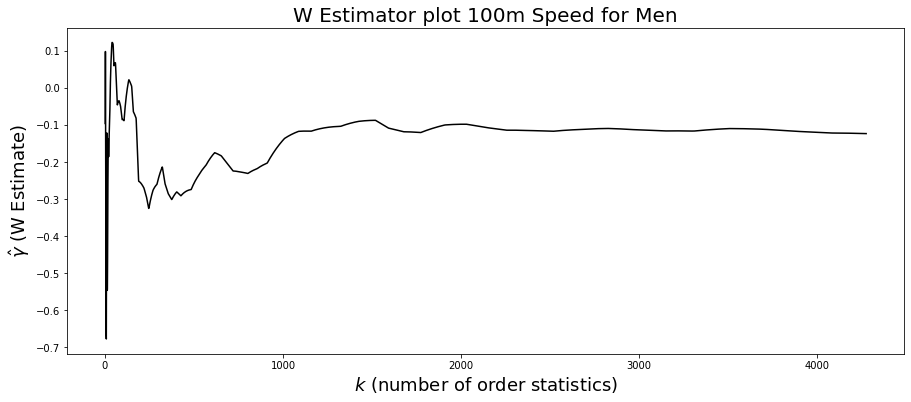

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), w_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (W Estimate)", fontsize=18)
plt.title(f"W Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/W_Estimator_{gender.title()}")
plt.show()

## Combined Plot of Estimator

The following shows the combined plot of the W estimator, the moment estimator and the pengs estimator. All estimator are valid for $\gamma < 0$. The Pickands estimator has some problems and will not be included here.

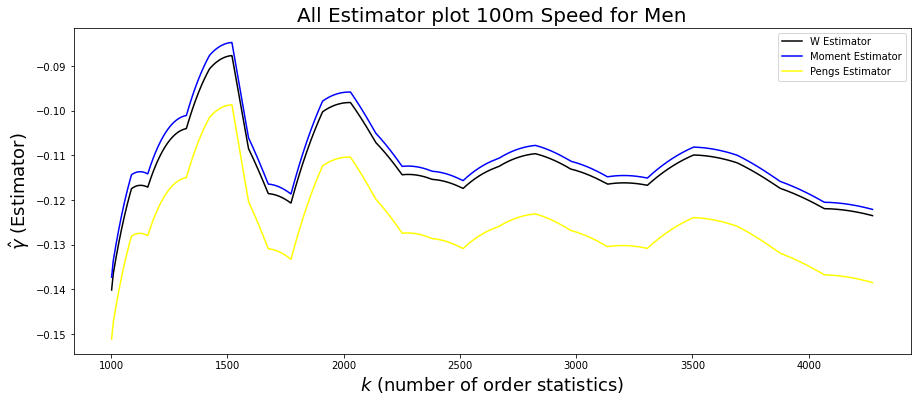

In [36]:
k = 1000  # k decides where we start the plot


plt.figure(figsize=(15, 6))
plt.plot(np.arange(k+2,n), w_estimators[k:], 'black', label="W Estimator")
plt.plot(np.arange(k+2,n), moment_estimators[k:], 'blue', label="Moment Estimator")
plt.plot(np.arange(k+2,n), pengs_estimators[k:], 'yellow', label="Pengs Estimator")
plt.legend(loc="best")
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Estimator)", fontsize=18)
plt.title(f"All Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/All_Estimator_{gender.title()}_k_{k}")
plt.show()

# Calculate the finite endpoint $x^{*}$

In [40]:
def finite_endpoint(k: int, X: np.array, m_estimator: float) -> float:
    a = X[k]*m_n(1, k, X)
    b = X[k]
    return b - a/m_estimator

In [41]:
# calculate all estimator for all k from 2, n-1
finite_endpoints = [finite_endpoint(k, X, m_estimator) for k, m_estimator in zip(range(2,n), moment_estimators)]

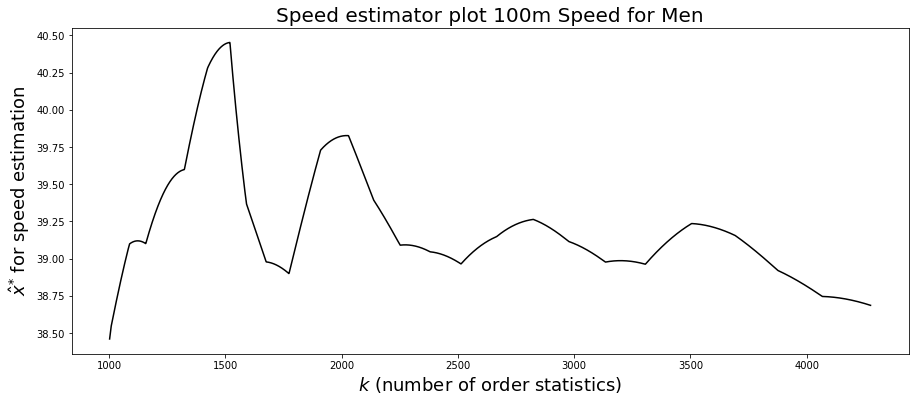

In [42]:
k = 1000  # k decides where to start the plot


plt.figure(figsize=(15, 6))
plt.plot(np.arange(k+2,n), finite_endpoints[k:], 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{x}^{*}$ for speed estimation", fontsize=18)
plt.title(f"Speed estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Speed_estimator_{gender.title()}_{k}")
plt.show()